In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('pokemon_data.csv')

# DATA OVERVIEW

In [3]:
df.shape

(800, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
#             800 non-null int64
Name          800 non-null object
Type 1        800 non-null object
Type 2        414 non-null object
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


In [5]:
df.describe()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [6]:
df.columns = df.columns.str.upper().str.replace(' ','') # Data renaming for convenience
df.head()

,#,NAME,TYPE1,TYPE2,HP,ATTACK,DEFENSE,SP.ATK,SP.DEF,SPEED,GENERATION,LEGENDARY
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [7]:
df[df['LEGENDARY'] == True].head(5) # Data filteration

,#,NAME,TYPE1,TYPE2,HP,ATTACK,DEFENSE,SP.ATK,SP.DEF,SPEED,GENERATION,LEGENDARY
156,144,Articuno,Ice,Flying,90,85,100,95,125,85,1,True
157,145,Zapdos,Electric,Flying,90,90,85,125,90,100,1,True
158,146,Moltres,Fire,Flying,90,100,90,125,85,90,1,True
162,150,Mewtwo,Psychic,NaN,106,110,90,154,90,130,1,True
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,106,190,100,154,100,130,1,True


In [8]:
df['MEGA'] = df.NAME.str.contains('Mega') # Creating extra column MEGA for Mega Pokemons

In [9]:
import re
df.NAME = df.NAME.apply(lambda x: re.sub(r'.*(?=Mega)','',x)) # Substitute Mega/Primal words and replacing them
df.NAME = df.NAME.apply(lambda x: re.sub(r'.*(?=Primal)','',x))

In [10]:
df.head(20)

,#,NAME,TYPE1,TYPE2,HP,ATTACK,DEFENSE,SP.ATK,SP.DEF,SPEED,GENERATION,LEGENDARY,MEGA
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,False
3,3,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,True
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,False
5,5,Charmeleon,Fire,NaN,58,64,58,80,65,80,1,False,False
6,6,Charizard,Fire,Flying,78,84,78,109,85,100,1,False,False
7,6,Mega Charizard X,Fire,Dragon,78,130,111,130,85,100,1,False,True
8,6,Mega Charizard Y,Fire,Flying,78,104,78,159,115,100,1,False,True
9,7,Squirtle,Water,NaN,44,48,65,50,64,43,1,False,False


In [11]:
df.drop('#',axis=1, inplace=True)

In [12]:
df.head(10)

,NAME,TYPE1,TYPE2,HP,ATTACK,DEFENSE,SP.ATK,SP.DEF,SPEED,GENERATION,LEGENDARY,MEGA
0,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,False
1,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,False
2,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,False
3,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,True
4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,False
5,Charmeleon,Fire,NaN,58,64,58,80,65,80,1,False,False
6,Charizard,Fire,Flying,78,84,78,109,85,100,1,False,False
7,Mega Charizard X,Fire,Dragon,78,130,111,130,85,100,1,False,True
8,Mega Charizard Y,Fire,Flying,78,104,78,159,115,100,1,False,True
9,Squirtle,Water,NaN,44,48,65,50,64,43,1,False,False


In [13]:
df.TYPE2.fillna(df['TYPE1'],inplace=True)

In [14]:
df.TYPE2.isna().sum()

0

In [15]:
df.set_index('NAME', inplace=True)

In [16]:
df[((df['TYPE1']=='Fire') | (df['TYPE1'] == 'Dragon')) & ((df['TYPE2'] == 'Dragon') | (df['TYPE2'] == 'Fairy'))]

,TYPE1,TYPE2,HP,ATTACK,DEFENSE,SP.ATK,SP.DEF,SPEED,GENERATION,LEGENDARY,MEGA
NAME,,,,,,,,,,,
Mega Charizard X,Fire,Dragon,78,130,111,130,85,100,1,False,True
Dratini,Dragon,Dragon,41,64,45,50,50,50,1,False,False
Dragonair,Dragon,Dragon,61,84,65,70,70,70,1,False,False
Mega Altaria,Dragon,Fairy,75,110,110,110,105,80,3,False,True
Bagon,Dragon,Dragon,45,75,60,40,30,50,3,False,False
Shelgon,Dragon,Dragon,65,95,100,60,50,50,3,False,False
Axew,Dragon,Dragon,46,87,60,30,40,57,5,False,False
Fraxure,Dragon,Dragon,66,117,70,40,50,67,5,False,False
Haxorus,Dragon,Dragon,76,147,90,60,70,97,5,False,False


In [17]:
print("Maximum HP at row:",df['HP'].argmax()) # argmax() tells the positional value of max
print("Maximum HP:",df['HP'].max())# Tells the max values

Maximum HP at row: Blissey
Maximum HP: 255


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  """Entry point for launching an IPython kernel.


In [18]:
print("The unique Pokemon types are", df['TYPE1'].unique())
print("\nThe number of unique Pokemon types are", df['TYPE1'].nunique())

The unique Pokemon types are ['Grass' 'Fire' 'Water' 'Bug' 'Normal' 'Poison' 'Electric' 'Ground'
 'Fairy' 'Fighting' 'Psychic' 'Rock' 'Ghost' 'Ice' 'Dragon' 'Dark' 'Steel'
 'Flying']

The number of unique Pokemon types are 18


In [19]:
df['TYPE1'].value_counts() # Value Counts for each variable
df.groupby(['TYPE1']).size() # Same as above
(df['TYPE1'] == 'Bug').sum() # Total values for given condition

69

In [20]:
df.describe() #Summary of the DataFrame

,HP,ATTACK,DEFENSE,SP.ATK,SP.DEF,SPEED,GENERATION
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


# VISUALISATIONS

### Distribution of Attack attribute among all generations

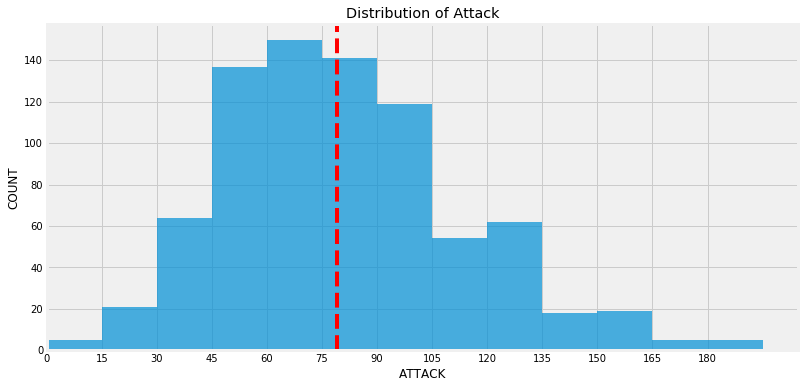

In [21]:
bins = range(0,200,15) # Useful for hisotgram distribution
fig = plt.figure(figsize=(12,6))
plt.title('Distribution of Attack')
plt.hist(df['ATTACK'],bins=bins,rwidth=1.1,alpha=0.7,align='mid')
plt.xlim(0)
plt.xticks(np.arange(0,190,15))
plt.xlabel('ATTACK')
plt.ylabel('COUNT')
plt.axvline(df['ATTACK'].mean(),linestyle='dashed',color='red')
plt.show()
# fig.show()

So we can see the total distribution of ATTACK and also see where the Average lies within the distribution.

### Fire vs Water - Scatter Plot

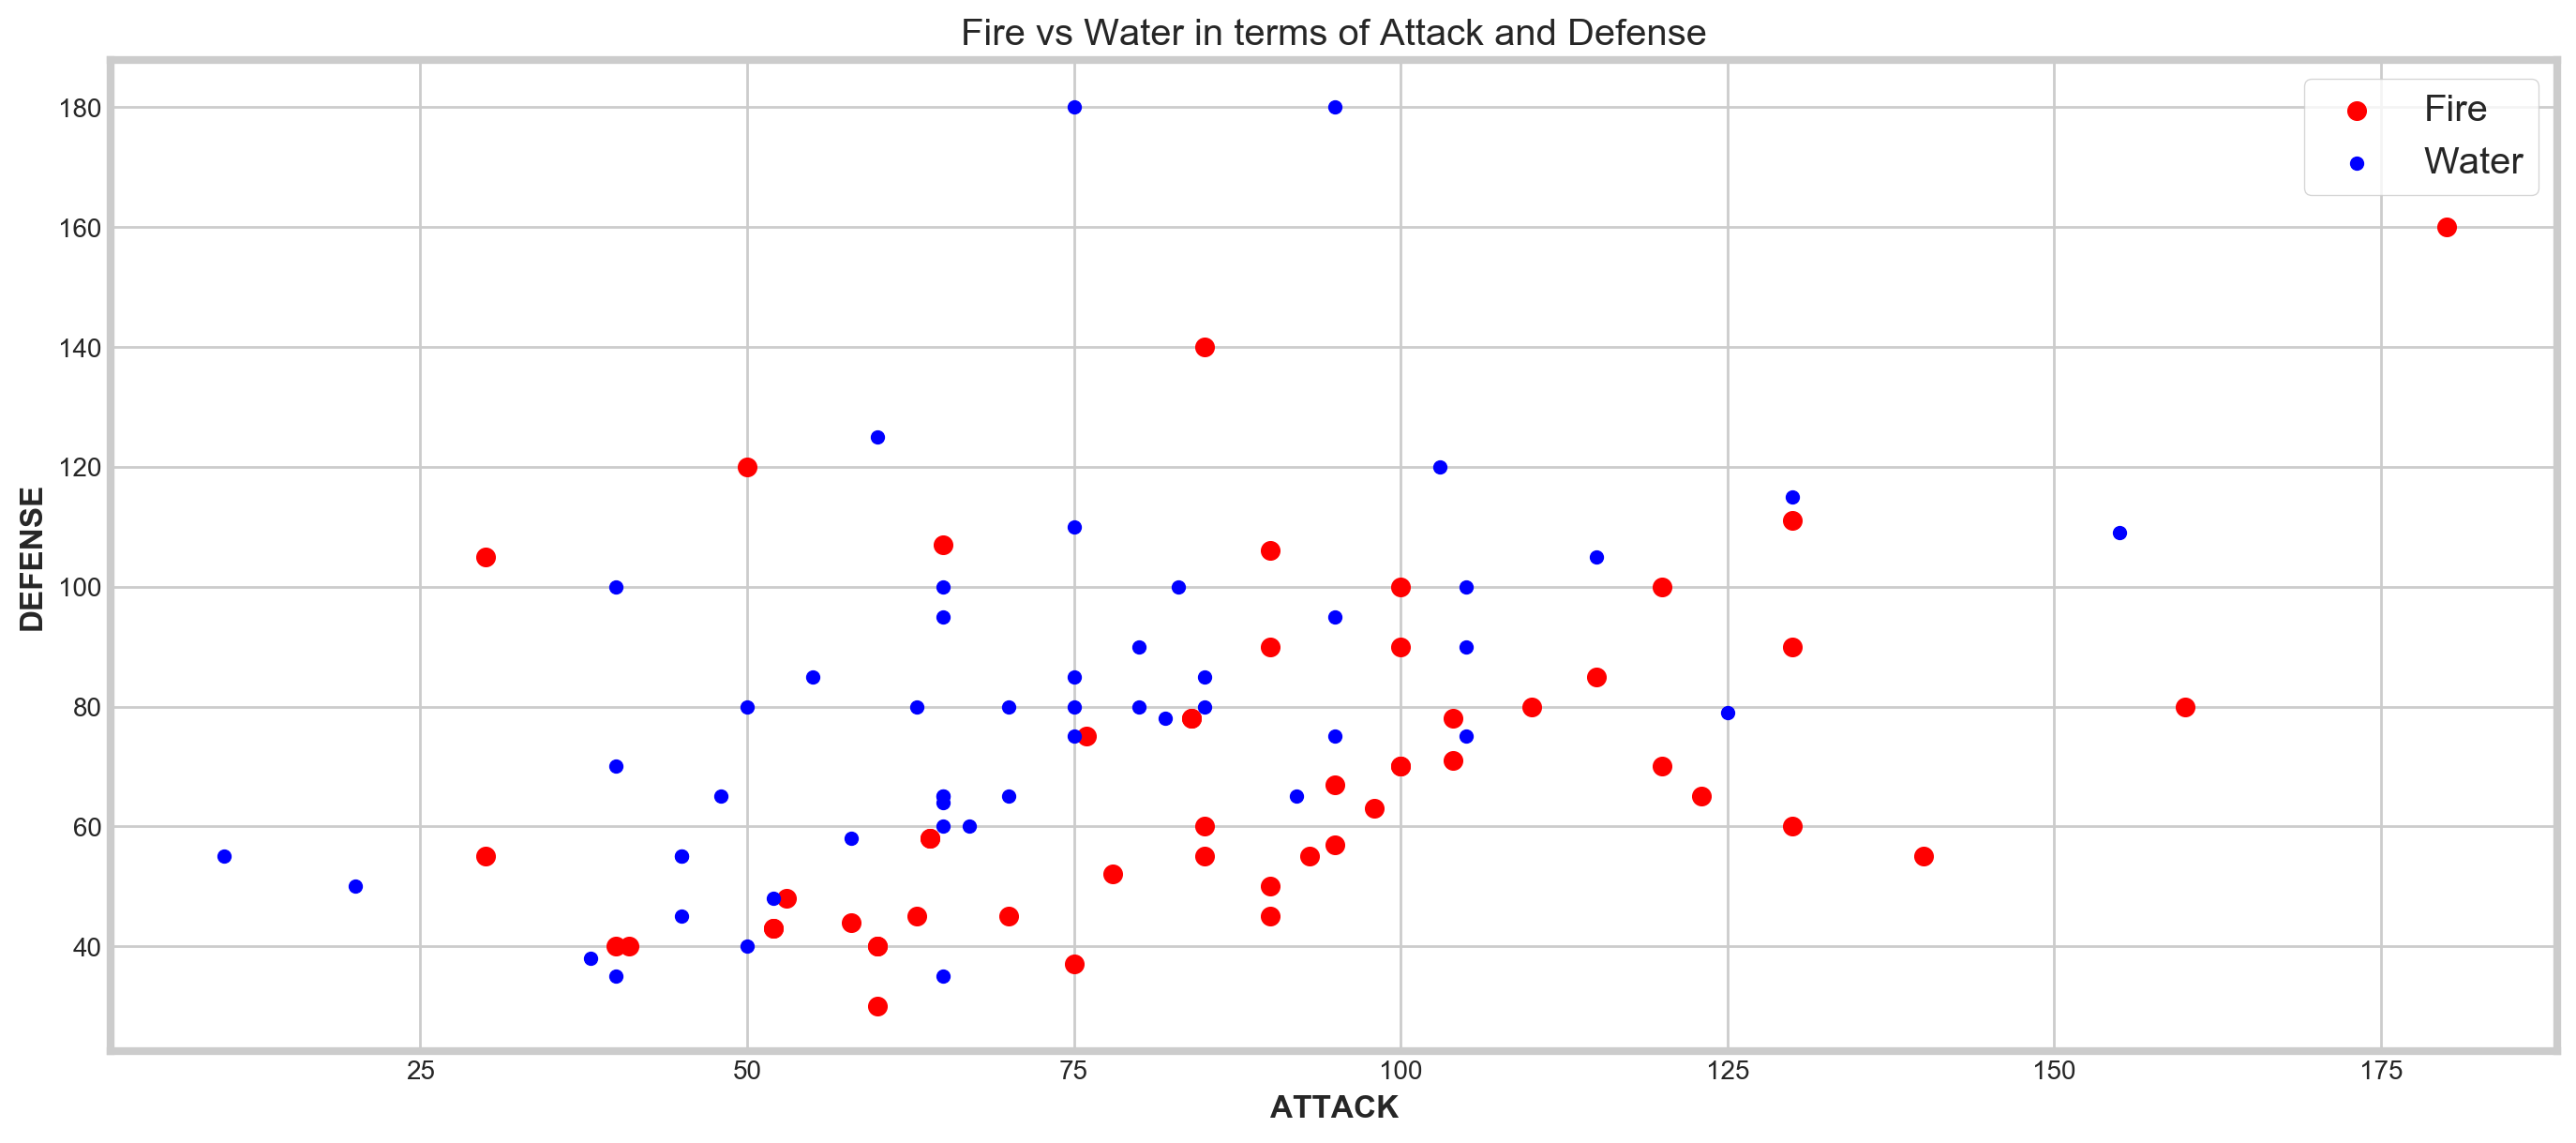

In [22]:
sns.set_style('whitegrid')
font = {'size':'large', 'weight':'bold'}

fire = df[(df['TYPE1'] == 'Fire') | (df['TYPE2'] == 'Fire')] #Fire attr
water = df[(df['TYPE1'] == 'Water') | (df['TYPE2'] == 'Water')] #Water attr
fvw = plt.figure(figsize=(15,7),dpi=200)
plt.scatter(fire.ATTACK.head(50),fire.DEFENSE.head(50),c='r',s=50,label='Fire')
plt.scatter(water.ATTACK.head(50),water.DEFENSE.head(50),c='b',s=25,label='Water')
plt.xlabel('ATTACK',fontdict=font)
plt.ylabel('DEFENSE',fontdict=font)
plt.title('Fire vs Water in terms of Attack and Defense')
plt.legend(loc='upper right',fontsize='x-large')
plt.show()

With this, we can concur that the Fire Pokemons are relatively more advanced for Attack and less for Defence. Meanwhile, Water Pokemons are more inclined towards better Defence and lower Attack.

## Strongest Pokemons by Type

First, we create a summary column 'TOTAL' with the sum of all vlaues.

In [23]:
df.insert(2,'TOTAL',(df.sum(axis=1)-1)) # Using insert to insert at #2

In [24]:
df.TOTAL = df.TOTAL.astype(int) # COnverting float to int

In [25]:
strong = df.sort_values(by='TOTAL', ascending=False)
strong.drop_duplicates(subset=['TYPE1'])

,TYPE1,TYPE2,TOTAL,HP,ATTACK,DEFENSE,SP.ATK,SP.DEF,SPEED,GENERATION,LEGENDARY,MEGA
NAME,,,,,,,,,,,,
Mega Rayquaza,Dragon,Flying,784,105,180,100,180,100,115,3,True,True
Mega Mewtwo Y,Psychic,Psychic,782,106,150,70,194,120,140,1,True,True
Primal Groudon,Ground,Fire,773,100,180,160,150,90,90,3,True,False
Primal Kyogre,Water,Water,773,100,150,90,180,160,90,3,True,False
Arceus,Normal,Normal,724,120,120,120,120,120,120,4,True,False
Mega Diancie,Rock,Fairy,707,50,160,110,160,110,110,6,True,True
Mega Metagross,Steel,Psychic,703,80,145,150,105,110,110,3,False,True
Yveltal,Dark,Flying,686,126,131,95,131,98,99,6,True,False
Xerneas,Fairy,Fairy,686,126,131,95,131,98,99,6,True,False


In [26]:
PokeTypes = df.TYPE1.value_counts()
PokeTypes.head(7)

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Name: TYPE1, dtype: int64

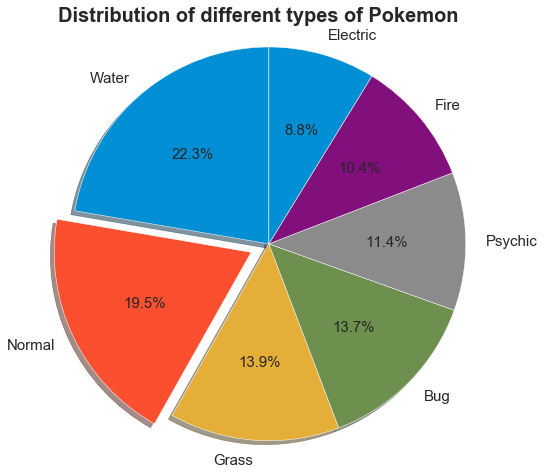

In [27]:
sizes = PokeTypes.values.tolist()[:7]
labels = PokeTypes.keys().tolist()[:7]
explode = [0,0.1,0,0,0,0,0]
font = {'size':'20','weight':'bold'}

pie = plt.figure(figsize=(8,8))
plt.title('Distribution of different types of Pokemon',fontdict=font)
plt.pie(sizes, labels=labels, explode=explode,shadow=True,startangle = 90,autopct='%1.1f%%',textprops={'size':'15'})
plt.axis('equal')
plt.show()

## All Statistics Analysis of Pokemons

In [28]:
df2 = df.drop(['TOTAL','GENERATION','LEGENDARY','MEGA'],axis=1)

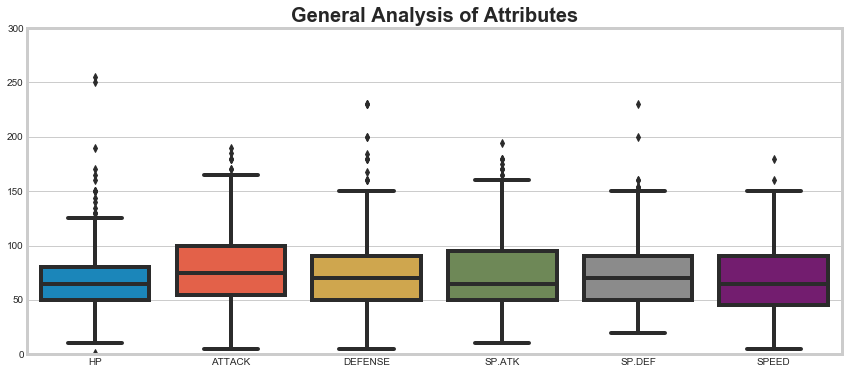

In [29]:
fig = plt.figure(figsize=(13,6))
sns.boxplot(data=df2)
plt.ylim(0,300)
plt.title('General Analysis of Attributes',fontdict=font)
plt.show()

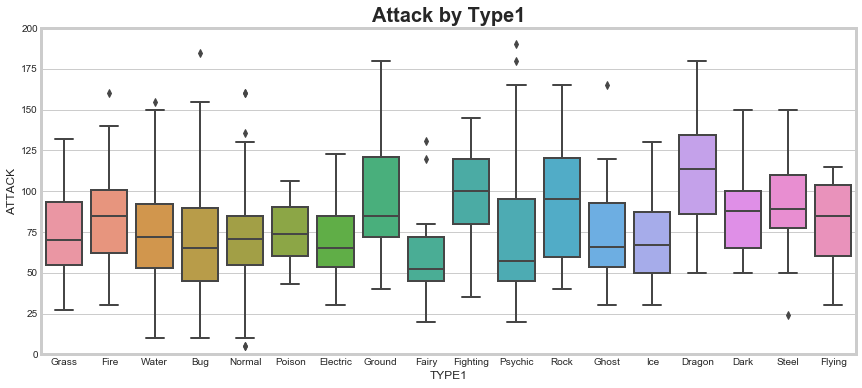

In [30]:
fig = plt.figure(figsize=(13,6))
sns.boxplot(x='TYPE1',y='ATTACK',data=df,linewidth=2)
plt.ylim(0,200)
plt.title('Attack by Type1',fontdict=font)
plt.show()

As we can see, the Dragon type has a greater overall Attack value. Fire type among the Grass and Water has the highest attack by a considerable amount.

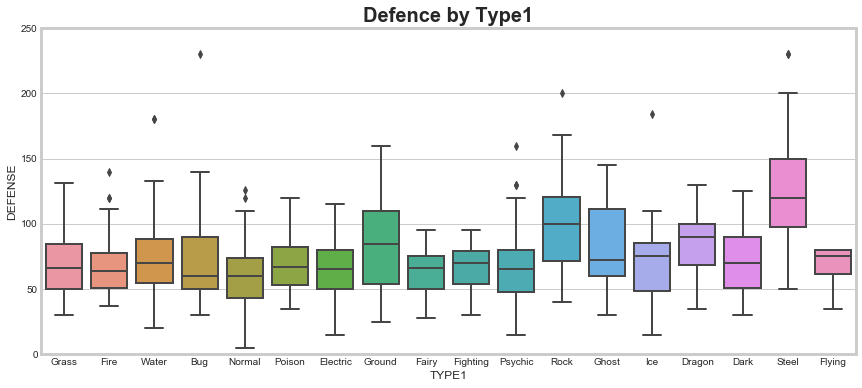

In [31]:
fig = plt.figure(figsize=(13,6))
sns.boxplot(x='TYPE1',y='DEFENSE',data=df,linewidth=2)
plt.ylim(0,250)
plt.title('Defence by Type1',fontdict=font)
plt.show()

With defence, we can see that, Normal type has the lowest defence of them all and therefore, should be used accordingly.
Whereas, the Steel type Pokemon has the highest defence.

## The same statistics using Violinplots

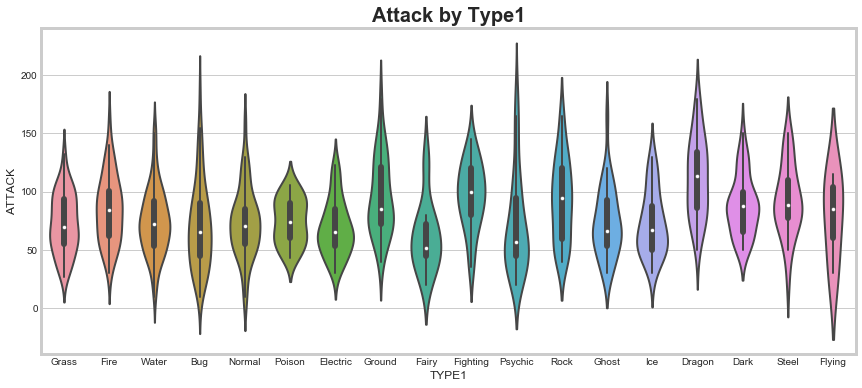

In [32]:
fig = plt.figure(figsize=(13,6))
sns.violinplot(x='TYPE1',y='ATTACK',data=df,linewidth=2)
# plt.ylim(0,200)
plt.title('Attack by Type1',fontdict=font)
plt.show()

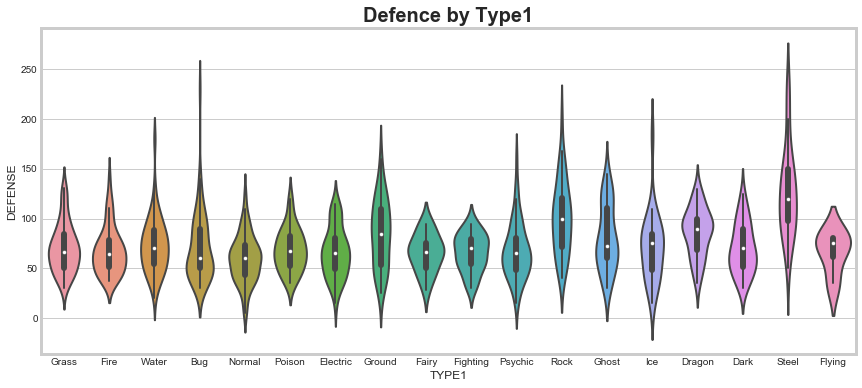

In [33]:
fig = plt.figure(figsize=(13,6))
sns.violinplot(x='TYPE1',y='DEFENSE',data=df,linewidth=2)
# plt.ylim(0,200)
plt.title('Defence by Type1',fontdict=font)
plt.show()

A violinplot, unlike a boxplot features density estimation of the underlying distribution. As we can see with these plots, the thicker width denotes parts where the density is higher.

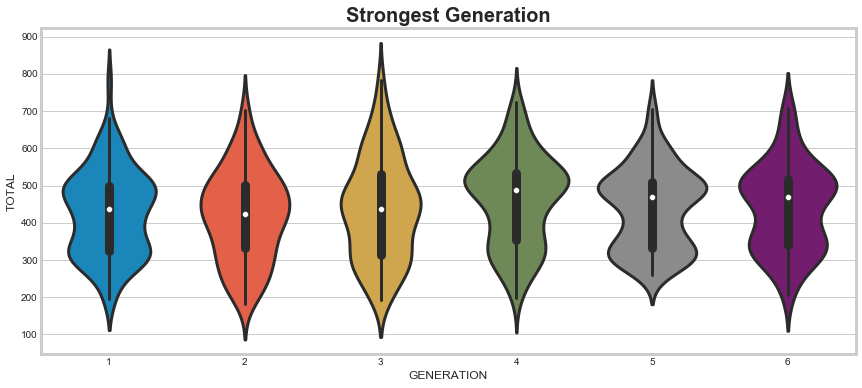

In [34]:
plt.subplots(figsize=(13,6))
plt.title('Strongest Generation', fontdict=font)
sns.violinplot(x='GENERATION',y='TOTAL',data=df, linewidth=3)

This shows that Generation 3 has better pokemons.

## Strong Pokemons by Type

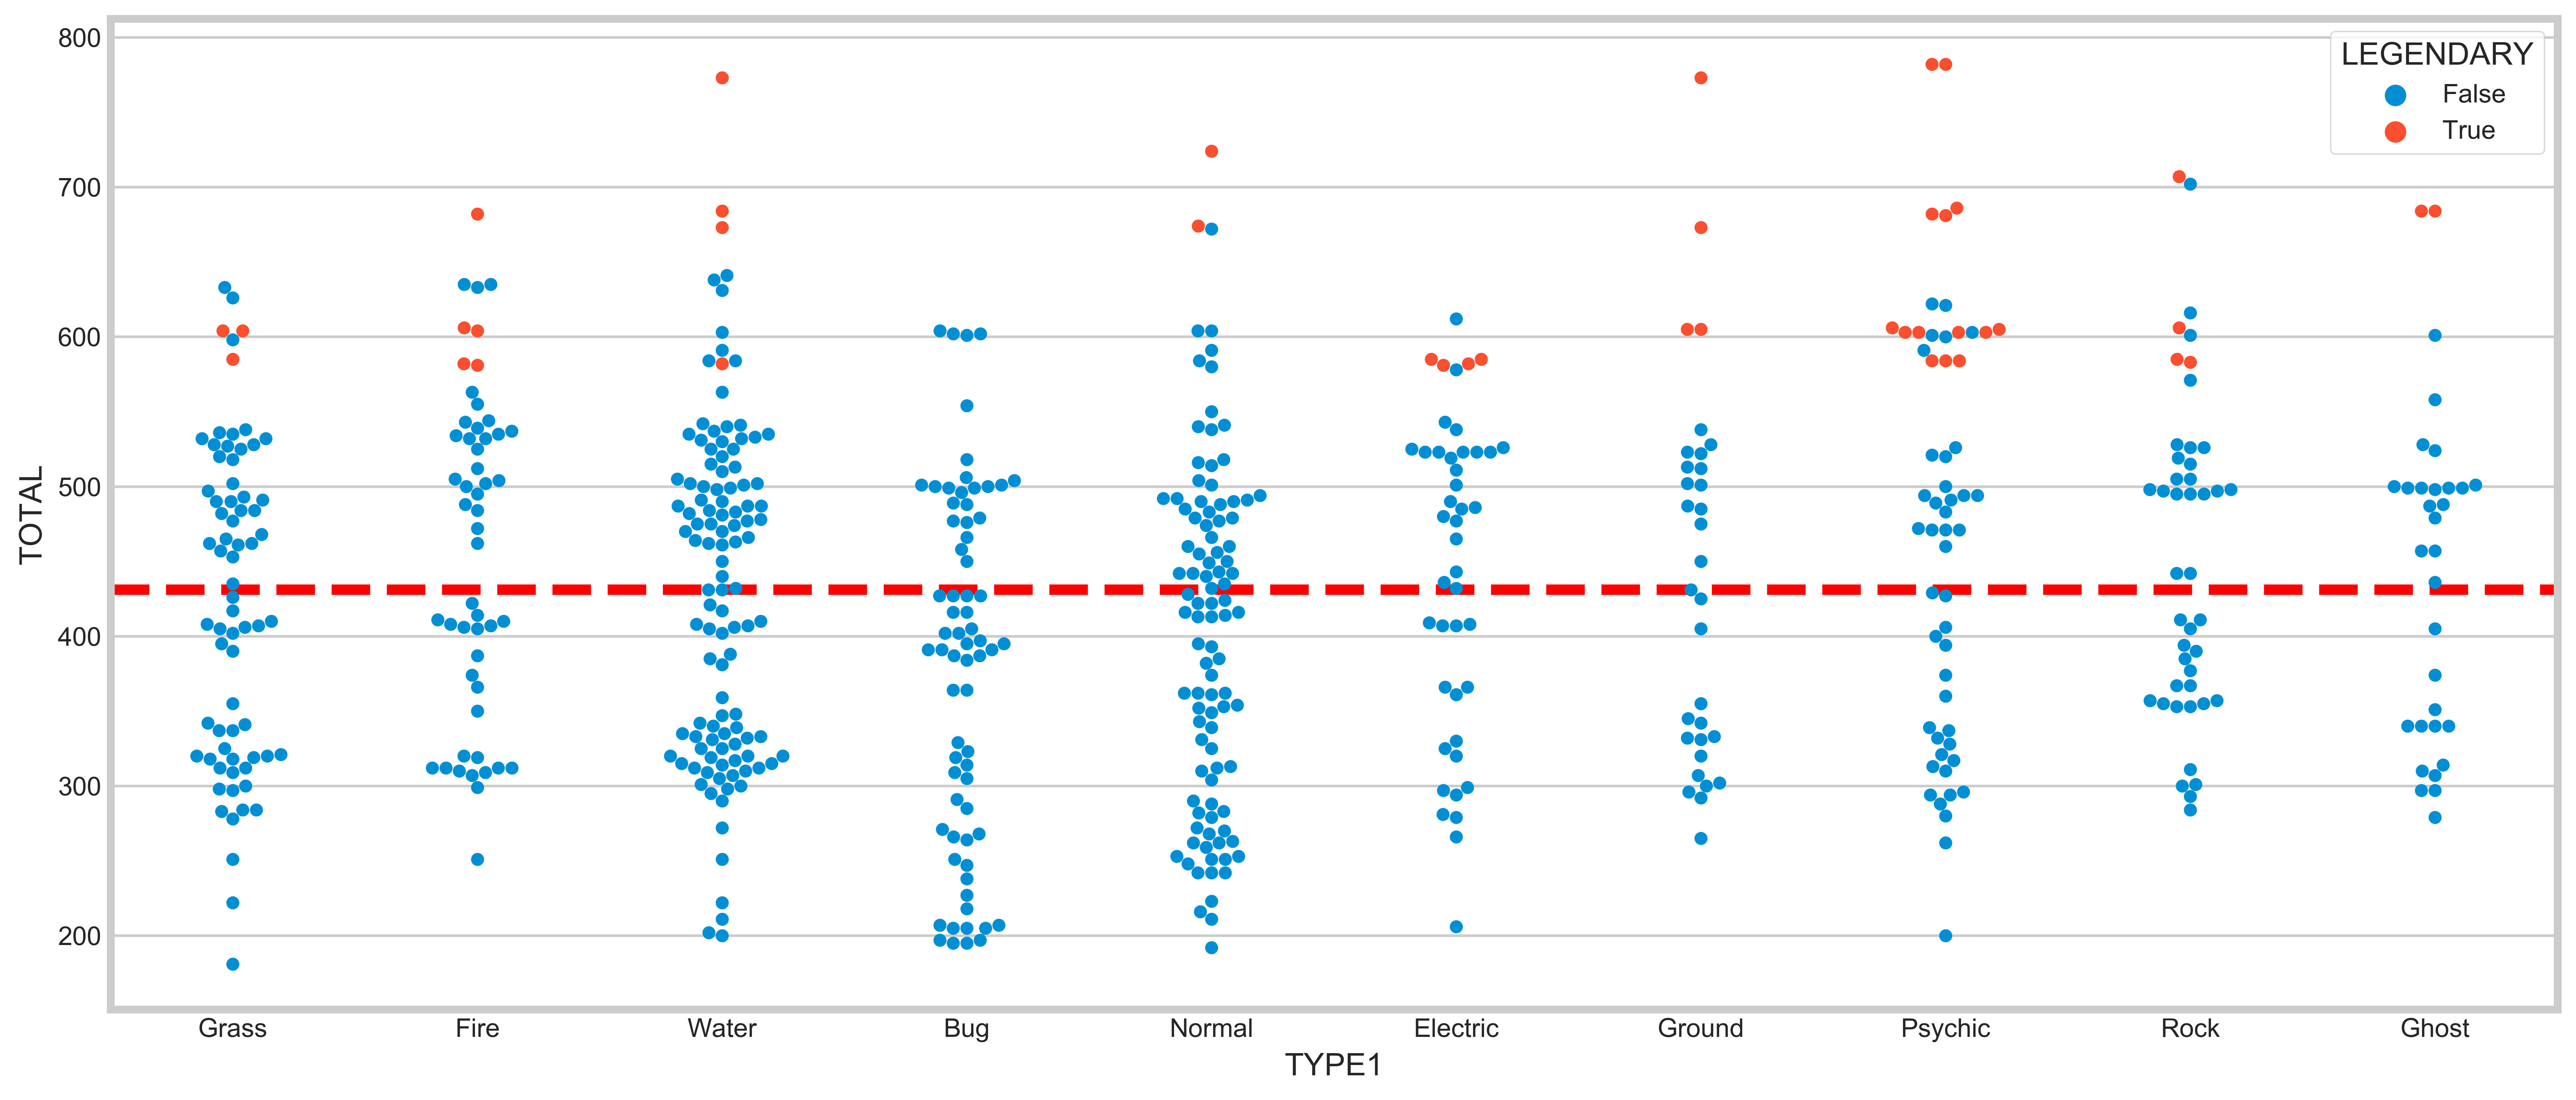

In [35]:
plt.figure(figsize=(15,7),dpi=600)
top_types = df['TYPE1'].value_counts()[:10]
df1 = df[df['TYPE1'].isin(top_types.index)]

sns.swarmplot(x='TYPE1',y='TOTAL',data=df1,hue='LEGENDARY')

plt.axhline(df1['TOTAL'].mean(),c='r',linestyle='dashed')
plt.show()

Legendary Pokemons are usually the strongest of all as we can deduce from the swarmplot.

## Correlation between attributes

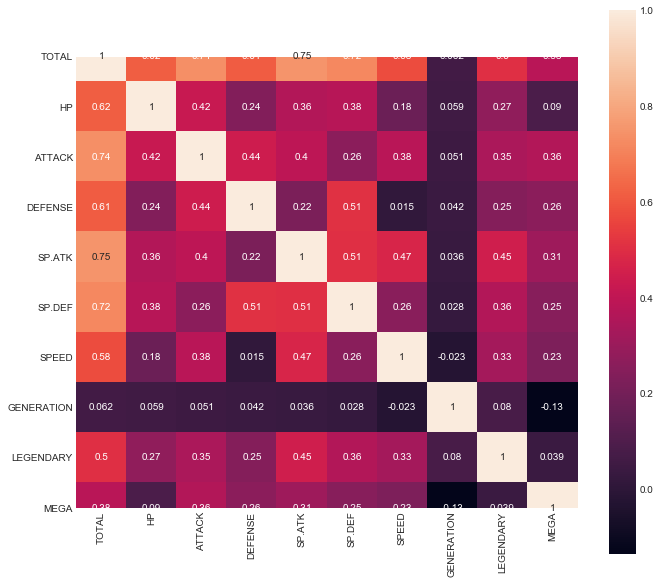

In [36]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,square=True)
plt.show()

## Number of Pokemons by Type and Generation

### Type1

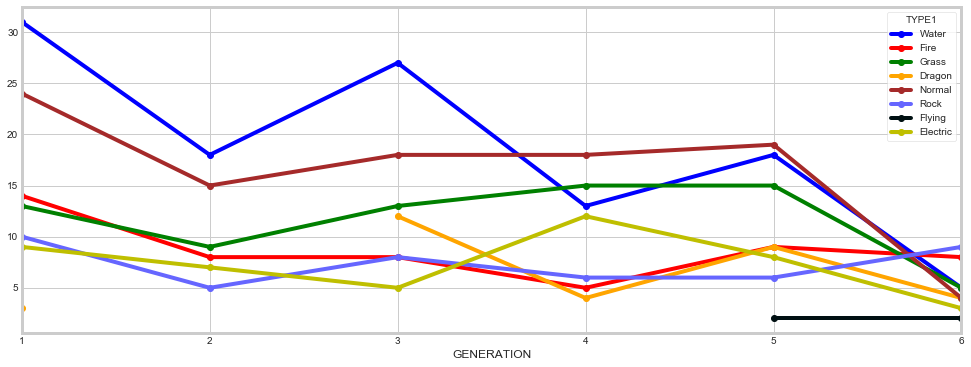

In [62]:
a = df.groupby(['GENERATION', 'TYPE1']).count().reset_index()
a = a[['GENERATION','TYPE1','TOTAL']]
a = a.pivot('GENERATION','TYPE1','TOTAL')

a[['Water','Fire','Grass','Dragon','Normal','Rock','Flying','Electric']].plot(figsize=(15,6),color=['b','r','g','#FFA500','brown','#6666ff','#001012','y'], marker='o')
plt.show()

As we can see, Water type in G1 had the highest attributes and has decreased considerably in the following generation.
Meanwhile, Grass has increased from G1 till G5 but from G5 to G6 like most others, it has decreased.

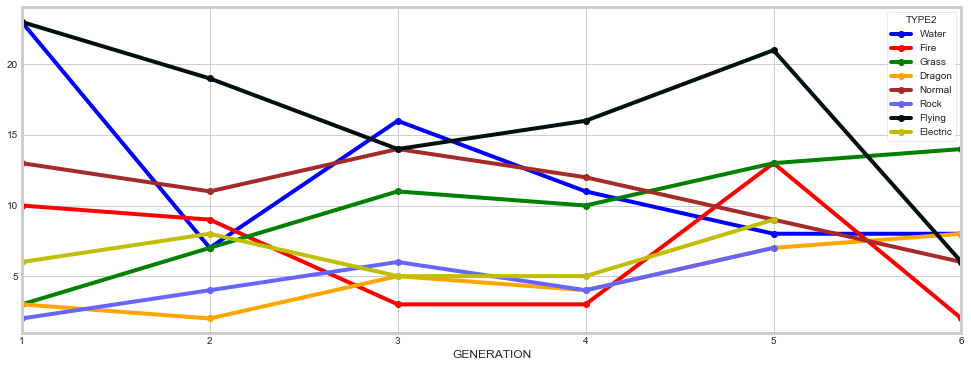

In [67]:
b = df.groupby(['GENERATION','TYPE2']).count().reset_index()
b = b[['GENERATION','TYPE2','TOTAL']]
b = b.pivot('GENERATION','TYPE2','TOTAL')

b[['Water','Fire','Grass','Dragon','Normal','Rock','Flying','Electric']].plot(figsize=(15,6),color=['b','r','g','#FFA500','brown','#6666ff','#001012','y'], marker='o')
plt.show()

From this, we can see, clearly that Grass type has increased number of Pokemons. Also, the same is the case with Dragon type.